<a href="https://colab.research.google.com/github/gulizhasan/ImageClassification/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split the full training set into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Normalize the images
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

# Print the shape of the datasets to confirm
print("Training set shape (features):", x_train.shape)
print("Training set shape (labels):", y_train.shape)
print("Validation set shape (features):", x_val.shape)
print("Validation set shape (labels):", y_val.shape)
print("Test set shape (features):", x_test.shape)
print("Test set shape (labels):", y_test.shape)


Training set shape (features): (40000, 32, 32, 3)
Training set shape (labels): (40000, 10)
Validation set shape (features): (10000, 32, 32, 3)
Validation set shape (labels): (10000, 10)
Test set shape (features): (10000, 32, 32, 3)
Test set shape (labels): (10000, 10)


In [14]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Reshape data for k-NN
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Start timing
start_time = time.time()

# Train the classifier
knn.fit(x_train_flat[:10000], y_train[:10000])

# Calculate and print the training time
knn_training_time = time.time() - start_time
print('k-NN training time:', knn_training_time, 'seconds')

# Predict on the validation set
y_val_pred = knn.predict(x_val_flat)
val_accuracy = accuracy_score(y_val, y_val_pred)
print('k-NN Validation accuracy:', val_accuracy)


k-NN training time: 0.02437114715576172 seconds
k-NN Validation accuracy: 0.2142


In [13]:
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a simple CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

# Train the model
model_cnn.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

cnn_training_time = time.time() - start_time
print('CNN training time:', cnn_training_time, 'seconds')


Epoch 1/10
1250/1250 [==============================] - 61s 48ms/step - loss: 1.5449 - accuracy: 0.4397 - val_loss: 1.2472 - val_accuracy: 0.5568
Epoch 2/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.1998 - accuracy: 0.5764 - val_loss: 1.1021 - val_accuracy: 0.6132
Epoch 3/10
1250/1250 [==============================] - 57s 46ms/step - loss: 1.0574 - accuracy: 0.6310 - val_loss: 1.0451 - val_accuracy: 0.6324
Epoch 4/10
1250/1250 [==============================] - 87s 69ms/step - loss: 0.9675 - accuracy: 0.6597 - val_loss: 1.0209 - val_accuracy: 0.6458
Epoch 5/10
1250/1250 [==============================] - 55s 44ms/step - loss: 0.8926 - accuracy: 0.6903 - val_loss: 0.9718 - val_accuracy: 0.6619
Epoch 6/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.8349 - accuracy: 0.7106 - val_loss: 0.9684 - val_accuracy: 0.6656
Epoch 7/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.7836 - accuracy: 0.7277 - val_loss: 0.9544 -

In [15]:
# RNN
from tensorflow.keras.layers import SimpleRNN

# Reshape data for RNN
x_train_rnn = x_train.reshape(x_train.shape[0], 32*32, 3)
x_val_rnn = x_val.reshape(x_val.shape[0], 32*32, 3)

# Define a simple RNN model
model_rnn = Sequential([
    SimpleRNN(50, input_shape=(32*32, 3), return_sequences=True),
    SimpleRNN(50),
    Dense(10, activation='softmax')
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

# Train the model
model_rnn.fit(x_train_rnn, y_train, epochs=10, validation_data=(x_val_rnn, y_val))

rnn_training_time = time.time() - start_time
print('RNN training time:', rnn_training_time, 'seconds')


Epoch 1/10
1250/1250 [==============================] - 597s 476ms/step - loss: 2.2110 - accuracy: 0.1766 - val_loss: 2.1519 - val_accuracy: 0.2007
Epoch 2/10
1250/1250 [==============================] - 573s 459ms/step - loss: 2.1533 - accuracy: 0.2067 - val_loss: 2.1423 - val_accuracy: 0.2155
Epoch 3/10
1250/1250 [==============================] - 578s 462ms/step - loss: 2.1257 - accuracy: 0.2198 - val_loss: 2.1237 - val_accuracy: 0.2099
Epoch 4/10
1250/1250 [==============================] - 558s 446ms/step - loss: 2.1058 - accuracy: 0.2246 - val_loss: 2.1015 - val_accuracy: 0.2263
Epoch 5/10
1250/1250 [==============================] - 548s 439ms/step - loss: 2.1549 - accuracy: 0.1980 - val_loss: 2.1589 - val_accuracy: 0.1946
Epoch 6/10
1250/1250 [==============================] - 554s 443ms/step - loss: 2.2706 - accuracy: 0.1432 - val_loss: 2.2862 - val_accuracy: 0.1159
Epoch 7/10
1250/1250 [==============================] - 554s 444ms/step - loss: 2.2244 - accuracy: 0.1624 - val_

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Convert one-hot encoded labels back to integers
y_train_integers = np.argmax(y_train[:10000], axis=1)
y_val_integers = np.argmax(y_val, axis=1)

# Initialize SVM classifier
svm = SVC(kernel='linear')

start_time = time.time()

# Train the classifier on a subset of data
svm.fit(x_train_flat[:10000], y_train_integers)

svm_training_time = time.time() - start_time
print('SVM training time:', svm_training_time, 'seconds')

# Predict on the validation set
y_val_pred = svm.predict(x_val_flat)
val_accuracy = accuracy_score(y_val_integers, y_val_pred)
print('Validation accuracy:', val_accuracy)


SVM training time: 381.55339765548706 seconds
Validation accuracy: 0.3209


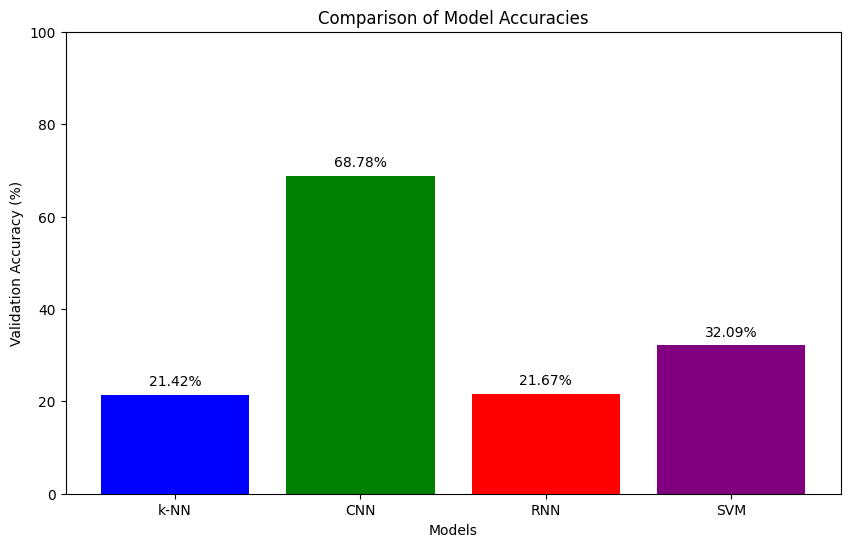

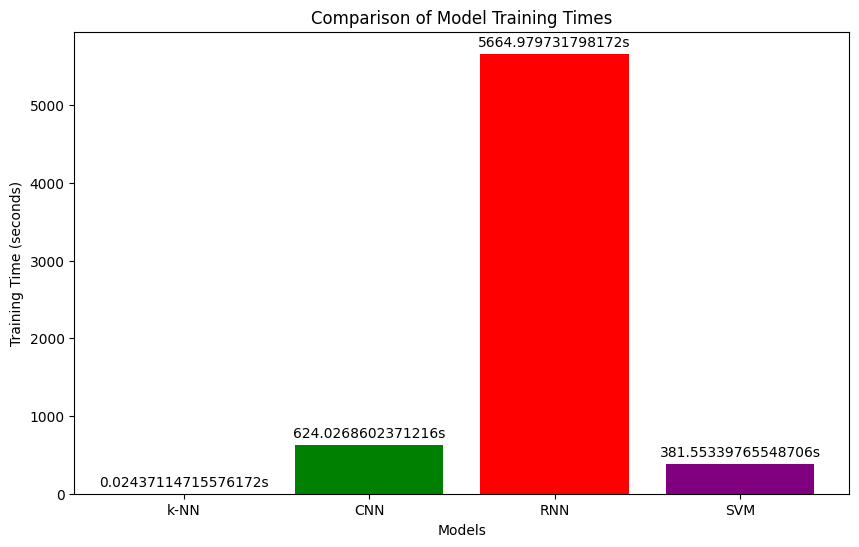

In [17]:
# Findings
import matplotlib.pyplot as plt

models = ['k-NN', 'CNN', 'RNN', 'SVM']
accuracies = [21.42, 68.78, 21.67, 32.09]  # Accuracies
training_times = [0.02437114715576172, 624.0268602371216, 5664.979731798172, 381.55339765548706]  # Training times in seconds

# Accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Validation Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 100])  # Set the limit to 100% for clarity
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f"{acc}%", ha = 'center')
plt.show()

# Training time graph
plt.figure(figsize=(10, 6))
plt.bar(models, training_times, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Model Training Times')
for i, time in enumerate(training_times):
    plt.text(i, time + 100, f"{time}s", ha = 'center')
plt.show()

